# Circuit Walker Sneaker Low Pass Filter

Author: Tony DiCola

This notebook goes through the process of generating and testing IIR filter coefficients for a low-pass filter used in the Circuit Walker Sneakers project.  The algorithm in this project is based on the adaptive step detection algorithm from: https://github.com/danielmurray/adaptiv/

## Setup

In [48]:
# This code is directly from the lowpass.py implementation in the adaptive step detection
# algorithm at:
#   https://github.com/danielmurray/adaptiv/blob/master/sensorData/lowPass.py
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (16,8)

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


def show_graphs(unfiltered, timestamps, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order)

    # Frequency response graph
    w, h = freqz(b, a, worN=8000)
    plt.subplot(2, 1, 1)
    plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
    plt.plot(cutoff, 0.5 * np.sqrt(2), 'ko')
    plt.axvline(cutoff, color='k')
    plt.xlim(0, 0.5 * fs)
    plt.title("Lowpass Filter Frequency Response")
    plt.xlabel('Frequency [Hz]')
    plt.grid()

    filtered = butter_lowpass_filter(unfiltered, cutoff, fs, order)

    plt.subplot(2, 1, 2)
    plt.plot(timestamps, unfiltered, 'r-', label='unfiltered')
    plt.plot(timestamps, filtered, 'g-', linewidth=2, label='filtered')
    plt.xlabel('Time [sec]')
    plt.grid()
    plt.legend()

    plt.subplots_adjust(hspace=0.35)
    plt.show()

## Define Filter Parameters

In [49]:
# These are the same as defined in the adaptive step detection algorithm from:
#   https://github.com/danielmurray/adaptiv
order   = 3      # order of the filter
fs      = 50.0   # sample rate, Hz
cutoff  = 3.667  # desired cutoff frequency of the filter, Hz

## Generate Sample Data

In [50]:
# Generate an array of sample data using sine and cosine waves.
import math
data = []
ts = []
t = 0
while t < 5.0:
    x = math.sin(2.0*math.pi*2.0*t) + math.cos(2.0*math.pi*20.0*t)
    data.append(x)
    ts.append(t)
    t += 1.0/fs

## Plot Sample And Filtered Data

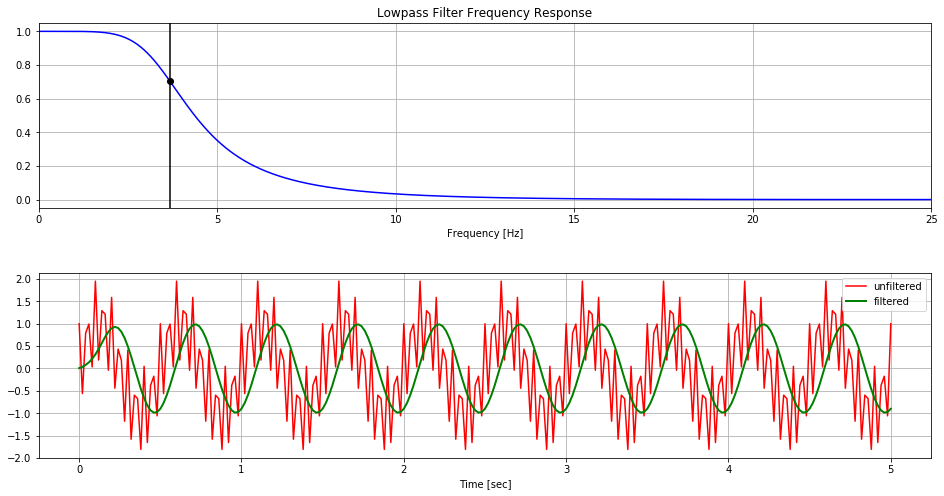

In [51]:
show_graphs(data, ts, cutoff, fs, order)

## Generate Filter Coefficients

In [59]:
b, a = butter(order, cutoff/(0.5*fs), btype='low', analog=False)
print('a = {{{}}}'.format(', '.join([str(x) for x in a])))
print('b = {{{}}}'.format(', '.join([str(x) for x in b])))

a = {1.0, -2.08554010137, 1.54484341043, -0.394448994245}
b = {0.00810678935123, 0.0243203680537, 0.0243203680537, 0.00810678935123}


## Test IIR Filter Algorithm

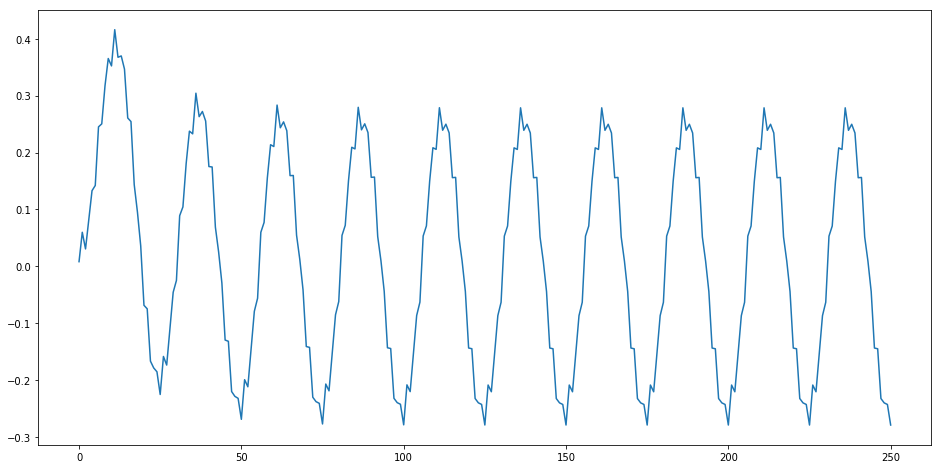

In [60]:
# Test an implementation of the IIR filtering algorithm using the generated
# coefficients above.  This implementation matches the one in the IIRFilter.h
# for the Circuit Walker Sneaker sketch and is useful to test the output of
# the filter.
M = len(b)
N = len(a)
_x = [0]*M
_y = [0]*N
outputs = []
for x in data:
    for i in range(1, M):
        _x[i] = _x[i-1]
    _x[0] = x
    for i in range(1, N):
        _y[i] = _y[i-1]
    y = 0.0
    for i in range(M):
        y += b[i]*_x[i]
    for i in range(1,N):
        y -= a[i]*_y[i]
    y /= a[0]
    _y[0] = y
    outputs.append(y)

plt.plot(outputs)
plt.show()